In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [2]:
dataset=pd.read_excel("dataset.xlsx")
a=pd.read_excel("sample.xlsx")

In [3]:
a

,Destination,Origin,To Area,Flight Date,day_name,flight_month,season,year,Flight Code,Days,...,Sold,Left,Occ.(%),dpt1,Block1,Sold1,Left1,Occ.(%)1,Occ.,Netto Currency
0,Turkey,Moscow 5443,Antalya,06.10.2021,Wednesday,October,Fall,2021,TK 3657,3,...,29,1,97,21:40:00,30,30,0,100,96.67,USD
1,Turkey,S.Petersburg 1275,Antalya,28.06.2022,Tuesday,June,Summer,2022,TK 3147,2,...,65,0,100,21:50:00,65,65,0,100,100.00,EUR
2,Turkey,Kazan 637,Antalya,30.10.2022,Sunday,Thursday,June,2022,TK 3673,7,...,65,0,100,10:35:00,65,65,0,100,100.00,EUR
3,Turkey,Mineralnye Vodi 266,Antalya,10.09.2022,Saturday,October,Fall,2022,WZ 4019,6,...,50,0,100,06:30:00,50,50,0,100,100.00,EUR
4,Turkey,Chelyabinsk 211,Antalya,13.08.2021,Friday,September,Fall,2021,RL 7709,5,...,478,0,100,07:25:00,478,478,0,100,100.00,EUR
5,Turkey,Samara 191,Antalya,19.09.2022,Monday,August,Summer,2022,TK 3955.,1,...,63,0,100,07:50:00,63,63,0,100,100.00,EUR
6,Turkey,Perm 183,Antalya,18.09.2022,Sunday,September,Fall,2022,TK 3149,7,...,65,0,100,09:50:00,65,65,0,100,100.00,EUR
7,Turkey,Ekaterinburg 182,Antalya,10.07.2022,Sunday,September,Fall,2022,PC 1581,7,...,20,0,100,20:45:00,20,20,0,100,100.00,USD
8,Turkey,Kaliningrad 178,Antalya,27.07.2022,Wednesday,July,Summer,2022,TK 3657,3,...,5,0,100,20:05:00,5,5,0,100,100.00,EUR
9,Turkey,Rostov-na-Donu 137,Antalya,21.08.2022,Sunday,July,Summer,2022,TK 3653,7,...,16,0,100,20:40:00,16,16,0,100,100.00,EUR


In [4]:
dataset

,Destination,Origin,To Area,Flight Date,day_name,flight_month,season,year,Flight Code,Days,...,Block1,Sold1,Left1,Occ.(%)1,Occ.,Netto,Netto Currency,Profit,prıce,day_convert
0,Turkey,Belgorod,Antalya,02.01.2020,Thursday,January,Winter,2020,WZ 4035.,4,...,220,151,69,69,95.45,177.00,EUR,61.73,238.73,2020-01-02
1,Turkey,Belgorod,Antalya,09.01.2020,Thursday,January,Winter,2020,WZ 4035.,4,...,220,220,0,100,0.00,174.00,EUR,NaN,174.00,2020-01-09
2,Turkey,Chelyabinsk,Antalya,02.01.2020,Thursday,January,Winter,2020,U6 1009,4,...,220,181,39,82,97.73,253.00,EUR,58.35,311.35,2020-01-02
3,Turkey,Chelyabinsk,Antalya,10.01.2020,Friday,January,Winter,2020,U6 1009,5,...,220,217,3,99,0.00,236.00,EUR,NaN,236.00,2020-01-10
4,Turkey,Chelyabinsk,Antalya,15.03.2020,Sunday,March,Spring,2020,WZ 4009,7,...,220,1,219,0,99.09,251.00,EUR,-50.69,200.31,2020-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9371,Turkey,S.Petersburg,Antalya,16.07.2022,Saturday,July,Summer,2022,TK 3673,6,...,65,65,0,100,100.00,377.18,EUR,420.95,798.13,2022-07-16
9372,Turkey,S.Petersburg,Antalya,16.07.2022,Saturday,July,Summer,2022,TK 3961,6,...,46,46,0,100,100.00,343.18,EUR,398.44,741.62,2022-07-16
9373,Turkey,S.Petersburg,Antalya,17.07.2022,Sunday,July,Summer,2022,TK 1234,7,...,34,34,0,100,100.00,370.00,USD,512.82,882.82,2022-07-17
9374,Turkey,S.Petersburg,Antalya,17.07.2022,Sunday,July,Summer,2022,TK 3657,7,...,54,54,0,100,100.00,377.18,EUR,467.51,844.69,2022-07-17


In [5]:
def label_encoding(dataset, a=None, s=None):
    if a is None:
        a = dataset
    values = dataset[s].unique().tolist()
    b = a[s].unique().tolist()
    for j in b:
        if j not in values:
            values.append(j)
    dictionary = {val: i for i, val in enumerate(values)}
    dataset[s] = dataset[s].map(dictionary)
    if a is not None:
        a[s] = a[s].map(dictionary)

In [6]:
label_encoding(dataset, a, 'Destination')
label_encoding(dataset, a, 'Origin')
label_encoding(dataset, a, 'To Area')
label_encoding(dataset, a, 'day_name')
label_encoding(dataset, a, 'flight_month')

label_encoding(dataset, a, 'season')
label_encoding(dataset, a, 'Netto Currency')
label_encoding(dataset, a, 'Flight Code')

label_encoding(dataset, a, 'Airline Company')
#label_encoding(dataset, a, 'Flight Date')

label_encoding(dataset, a, 'dpt')
label_encoding(dataset, a, 'dpt1')

In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Destination      11 non-null     int64  
 1   Origin           11 non-null     int64  
 2   To Area          11 non-null     int64  
 3   Flight Date      11 non-null     object 
 4   day_name         11 non-null     int64  
 5   flight_month     11 non-null     int64  
 6   season           11 non-null     int64  
 7   year             11 non-null     int64  
 8   Flight Code      11 non-null     int64  
 9   Days             11 non-null     int64  
 10  Airline Company  11 non-null     int64  
 11  dpt              11 non-null     int64  
 12  Block            11 non-null     int64  
 13  Sold             11 non-null     int64  
 14  Left             11 non-null     int64  
 15  Occ.(%)          11 non-null     int64  
 16  dpt1             11 non-null     int64  
 17  Block1           1

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Destination      9376 non-null   int64  
 1   Origin           9376 non-null   int64  
 2   To Area          9376 non-null   int64  
 3   Flight Date      9376 non-null   object 
 4   day_name         9376 non-null   int64  
 5   flight_month     9376 non-null   int64  
 6   season           9376 non-null   int64  
 7   year             9376 non-null   int64  
 8   Flight Code      9376 non-null   int64  
 9   Days             9376 non-null   int64  
 10  Airline Company  9376 non-null   int64  
 11  dpt              9376 non-null   int64  
 12  Block            9376 non-null   int64  
 13  Sold             9376 non-null   int64  
 14  Left             9376 non-null   int64  
 15  Occ.(%)          9376 non-null   int64  
 16  dpt1             9376 non-null   int64  
 17  Block1        

In [9]:
dataset.isna().sum()

Destination          0
Origin               0
To Area              0
Flight Date          0
day_name             0
flight_month         0
season               0
year                 0
Flight Code          0
Days                 0
Airline Company      0
dpt                  0
Block                0
Sold                 0
Left                 0
Occ.(%)              0
dpt1                 0
Block1               0
Sold1                0
Left1                0
Occ.(%)1             0
Occ.                 0
Netto                0
Netto Currency       0
Profit             111
prıce                0
day_convert          0
dtype: int64

array([[<AxesSubplot: title={'center': 'Destination'}>,
        <AxesSubplot: title={'center': 'Origin'}>,
        <AxesSubplot: title={'center': 'To Area'}>,
        <AxesSubplot: title={'center': 'day_name'}>,
        <AxesSubplot: title={'center': 'flight_month'}>],
       [<AxesSubplot: title={'center': 'season'}>,
        <AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'Flight Code'}>,
        <AxesSubplot: title={'center': 'Days'}>,
        <AxesSubplot: title={'center': 'Airline Company'}>],
       [<AxesSubplot: title={'center': 'dpt'}>,
        <AxesSubplot: title={'center': 'Block'}>,
        <AxesSubplot: title={'center': 'Sold'}>,
        <AxesSubplot: title={'center': 'Left'}>,
        <AxesSubplot: title={'center': 'Occ.(%)'}>],
       [<AxesSubplot: title={'center': 'dpt1'}>,
        <AxesSubplot: title={'center': 'Block1'}>,
        <AxesSubplot: title={'center': 'Sold1'}>,
        <AxesSubplot: title={'center': 'Left1'}>,
        <AxesSu

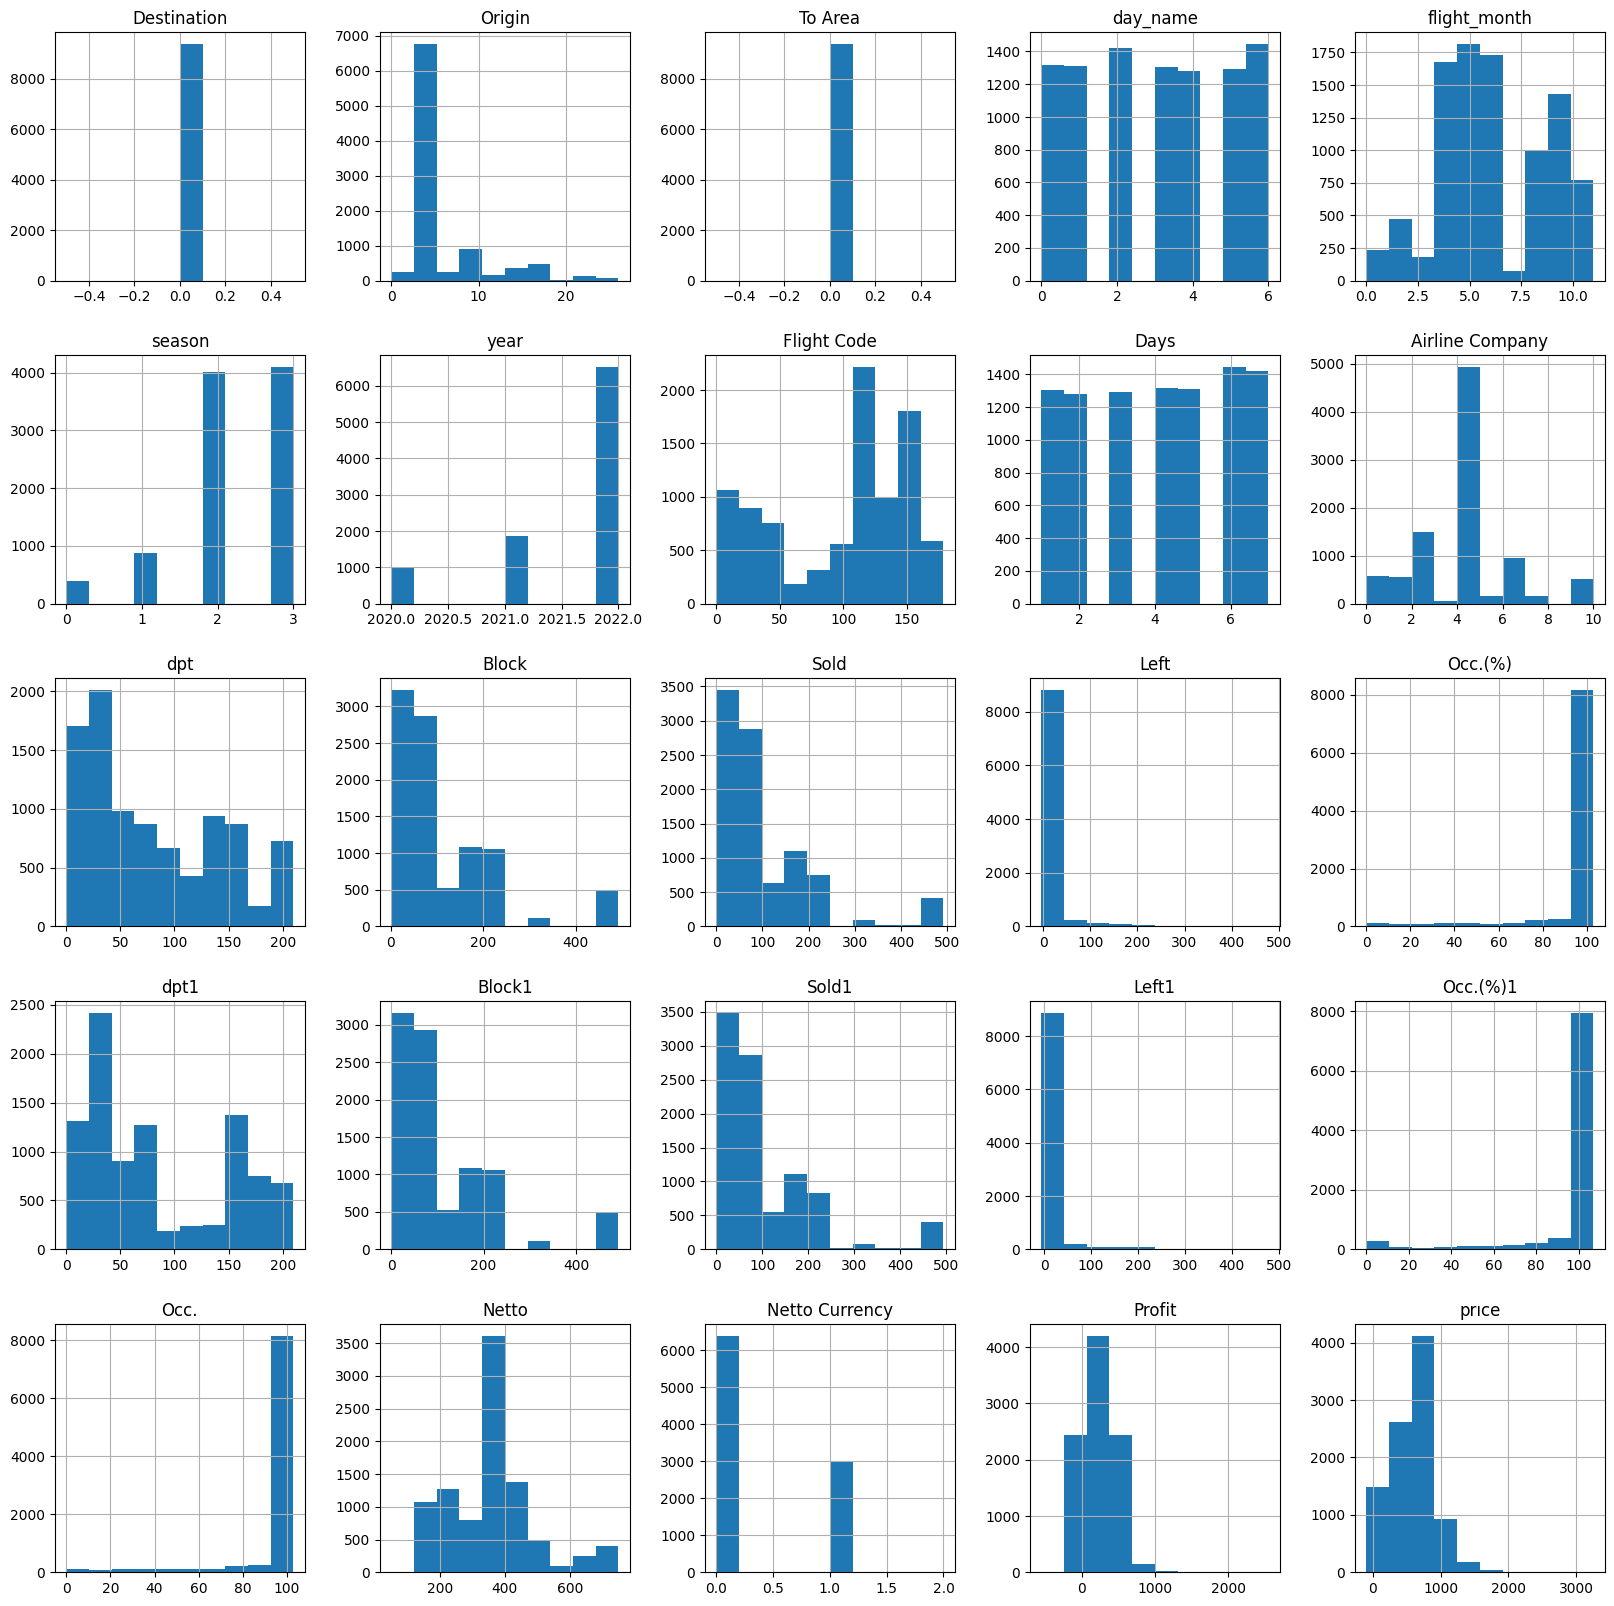

In [10]:
dataset.hist(figsize=(20,20))

In [11]:
dataset["Profit"]=dataset["Profit"].fillna(dataset["Profit"].median())

In [12]:
dataset["Date"]= pd.to_datetime(dataset["Flight Date"], format='%d.%m.%Y')
dataset = dataset.sort_values(by=['Date'], ascending=True)

Text(0, 0.5, 'Price ($)')

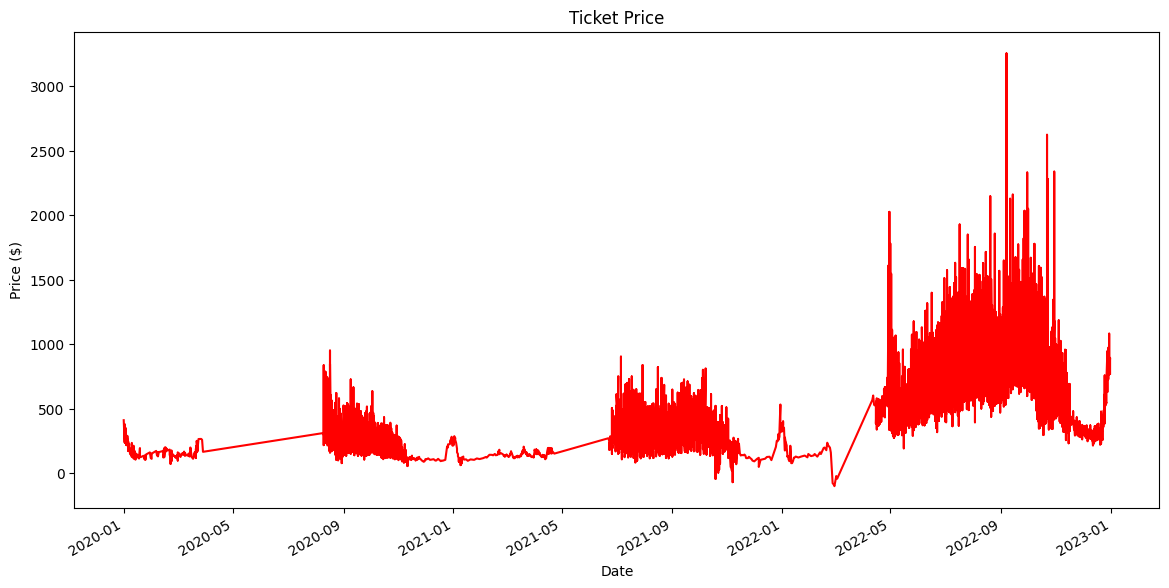

In [13]:
dataset.set_index("Date").prıce.plot(figsize=(14,7), title='Ticket Price',color = 'red')
plt.xlabel('Date')
plt.ylabel('Price ($)')

In [14]:
dataset = dataset.drop(['Date','day_convert'], axis=1)
label_encoding(dataset, a, 'Flight Date')

In [15]:
dataset.head()

,Destination,Origin,To Area,Flight Date,day_name,flight_month,season,year,Flight Code,Days,...,dpt1,Block1,Sold1,Left1,Occ.(%)1,Occ.,Netto,Netto Currency,Profit,prıce
166,0,4,0,0,5,0,0,2020,19,3,...,1,220,43,177,20,100.00,173.0,0,239.21,412.21
0,0,0,0,1,0,0,0,2020,0,4,...,0,220,151,69,69,95.45,177.0,0,61.73,238.73
167,0,4,0,1,0,0,0,2020,19,4,...,2,220,216,4,98,98.64,194.0,0,186.05,380.05
168,0,4,0,1,0,0,0,2020,20,4,...,1,330,162,168,49,99.39,184.0,0,182.96,366.96
57,0,5,0,1,0,0,0,2020,11,4,...,0,220,138,82,63,84.55,226.0,0,133.62,359.62


## Random Forest Regression

In [16]:
X = dataset.drop(['prıce','Netto','Profit'], axis=1) # independent variables
y = dataset.iloc[:, -2]  # dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X, y = make_regression(n_features=23, n_samples=9376,random_state=0)
rf = RandomForestRegressor(n_estimators = 23, max_depth = 30,min_samples_split=5,random_state = 42)

rf.fit(X_train, y_train)

rf_score = rf.score(X_train, y_train)
rf_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, rf_pred)
mae = mean_absolute_error(y_test, rf_pred)

print("R^squared:", rf_score)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("MAE:",mae)

R^squared: 0.9503699118442168
MSE:  8173.040921145627
RMSE:  90.404872220172
MAE: 51.14635694529068


In [17]:
X_train

,Destination,Origin,To Area,Flight Date,day_name,flight_month,season,year,Flight Code,Days,...,Sold,Left,Occ.(%),dpt1,Block1,Sold1,Left1,Occ.(%)1,Occ.,Netto Currency
4776,0,4,0,692,2,6,2,2022,125,7,...,193,0,100,163,193,193,0,100,100.00,0
7393,0,10,0,667,5,5,2,2022,145,3,...,45,0,100,80,45,45,0,100,100.00,0
2644,0,5,0,341,4,4,3,2021,85,2,...,15,0,100,131,15,15,0,100,100.00,0
8716,0,4,0,602,3,9,3,2022,111,1,...,163,0,100,41,163,163,0,100,100.00,0
7690,0,5,0,688,5,6,2,2022,148,3,...,5,0,100,188,5,5,0,100,100.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8175,0,10,0,624,4,4,3,2022,144,2,...,61,0,100,79,61,61,0,100,100.00,0
5248,0,4,0,609,3,9,3,2022,125,1,...,193,0,100,163,193,193,0,100,100.00,0
6843,0,4,0,615,2,9,3,2022,111,7,...,163,0,100,41,163,163,0,100,100.00,0
850,0,4,0,157,6,6,2,2020,20,6,...,474,5,99,0,480,458,22,95,98.96,0


In [18]:
X_train.columns

Index(['Destination', 'Origin', 'To Area', 'Flight Date', 'day_name',
       'flight_month', 'season', 'year', 'Flight Code', 'Days',
       'Airline Company', 'dpt', 'Block', 'Sold', 'Left', 'Occ.(%)', 'dpt1',
       'Block1', 'Sold1', 'Left1', 'Occ.(%)1', 'Occ.', 'Netto Currency'],
      dtype='object')

In [19]:
pred=rf.predict(a)
rfr_pred=pd.DataFrame(pred,columns=["RFR Predicted price"])
rfr_pred

,RFR Predicted price
0,108.254661
1,236.077507
2,208.959157
3,288.151866
4,33.809645
5,450.310835
6,477.908021
7,519.524294
8,562.605334
9,472.916793


In [20]:
def plot_results(y_test, y_pred):
    x_ax = range(len(y_test))
    plt.plot(x_ax, y_test, linewidth=1, label="original")
    plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
    plt.title("y-test and y-predicted data")
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

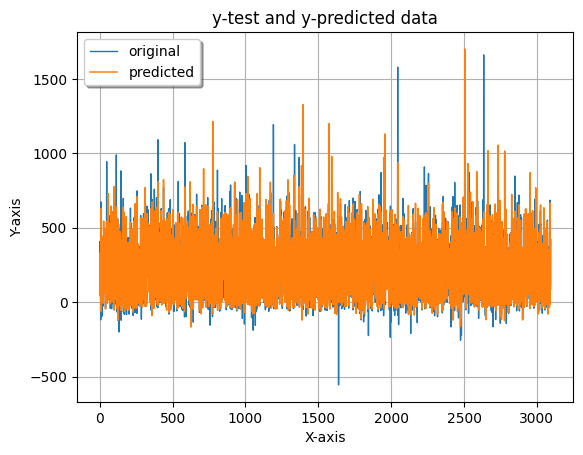

In [21]:
plot_results(y_test, rf_pred)

## Decision Tree Regression

In [22]:
regressor = DecisionTreeRegressor(random_state=0)

DT_Regressor = tree.DecisionTreeRegressor()
DT_Regressor.fit(X_train, y_train)

cross_val = cross_val_score(DT_Regressor, X_test, y_test, cv=5)
scores = absolute(cross_val)

print("K-fold cross-validation",cross_val)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

dt_pred=DT_Regressor.predict(X_test)
mae = mean_absolute_error(y_test, dt_pred)
dt_score = DT_Regressor.score(X_train, y_train)
mse = mean_squared_error(y_test, dt_pred)

print("R-squared:", dt_score)
print("MSE:", mse)
print("RMSE:", mse**(1/2.0)) 
print("MAE:",mae)

K-fold cross-validation [0.73097185 0.73210389 0.60081724 0.52746057 0.69126703]
Mean MAE: 0.657 (0.080)
R-squared: 1.0
MSE: 15682.419917382875
RMSE: 125.22946904536039
MAE: 68.27442003231019


In [23]:
dtr_pred = DT_Regressor.predict(a)
dtr_pred=pd.DataFrame(dt_pred,columns=['DT Predicted price'])
dtr_pred

,DT Predicted price
0,78.25
1,271.15
2,185.16
3,97.24
4,307.97
...,...
3090,457.54
3091,-8.39
3092,249.63
3093,442.31


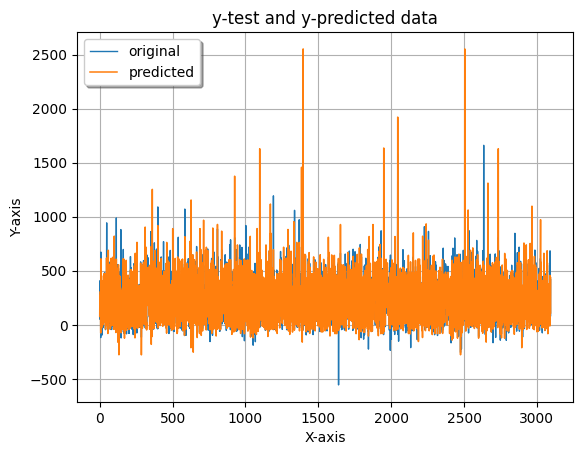

In [24]:
plot_results(y_test, dt_pred)

## Ridge Regression 

In [25]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(ridge, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)

ridge_pred = ridge.predict(X_test)
ridscore = ridge.score(X_train, y_train)
mse = mean_squared_error(y_test, ridge_pred)
mae = mean_absolute_error(y_test, ridge_pred)

print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
print("R-squared:", ridscore)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("MAE:",mae)

Mean MAE: 0.017 (0.001)
R-squared: 0.48499016678626095
MSE:  21441.8692815168
RMSE:  146.43042471261498
MAE: 107.03537419106706


In [26]:
rid_pred = ridge.predict(a)
rid_pred=pd.DataFrame(rid_pred,columns=['Ridge Predicted price'])
rid_pred

,Ridge Predicted price
0,52.153679
1,220.126061
2,315.803690
3,52.527404
4,-220.049236
5,220.462652
6,175.718622
7,14.293989
8,209.342808
9,158.226018


## Lasso Regression

In [27]:
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)

alpha = lasso_cv.alpha_
alpha

lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

lasso_score=lasso.score(X_train, y_train)
lasso_pred=lasso.predict(X_test)
mse = mean_squared_error(y_test, lasso_pred)
mae = mean_absolute_error(y_test, lasso_pred)

print("R-squared:", lasso_score)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("MAE:",mae)

R-squared: 0.4849801082443297
MSE:  21439.915211400432
RMSE:  146.42375221049497
MAE: 107.03350273688888


C:\Users\90541\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\90541\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.330e+07, toler

In [28]:
las_pred=lasso.predict(a)
las_pred=pd.DataFrame(las_pred,columns=['Lasso Predicted price'])
las_pred

,Lasso Predicted price
0,53.575399
1,220.252805
2,315.726489
3,52.582333
4,-220.159351
5,220.595626
6,175.810767
7,14.347573
8,209.521701
9,158.316629


## Linear Regression

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_score=lr.score(X_train, y_train)
mse = mean_squared_error(y_test, lr_pred)
mae = mean_absolute_error(y_test, lr_pred)

print('Coefficients: ', lr.coef_)
print('Variance score: {}'.format(lr.score(X_test, y_test)))
print("interception:",lr.intercept_)

print("R-squared:", lr_score)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("MAE:",mae)

Coefficients:  [ 0.00000000e+00 -7.76407590e+00  5.01203985e+10  1.52127572e-01
 -6.64760589e-01 -5.53860911e+00  4.80608394e+01  4.17552989e+01
  1.50907161e+00  1.84358123e+00 -1.65797627e+00 -3.54097193e-02
  1.28995321e+13 -1.28995321e+13 -1.28995321e+13 -2.65591160e+00
 -5.97107185e-02  7.39920189e+12 -7.39920189e+12 -7.39920189e+12
 -3.17828029e-01  5.12957378e+00 -1.18613136e+02]
Variance score: 0.5123480759303071
interception: -84542.6130910683
R-squared: 0.48490017842574173
MSE:  21451.134062534846
RMSE:  146.46205673325377
MAE: 107.0067956276015


In [30]:
linear_pred=lr.predict(a)
linear_pred=pd.DataFrame(linear_pred,columns=['Linear Predicted price'])
linear_pred

,Linear Predicted price
0,42.585617
1,208.717734
2,303.155234
3,40.623984
4,-230.126016
5,208.467734
6,163.030234
7,0.948348
8,193.147422
9,142.248984


## Xgboost Regression

In [31]:
xgb = XGBRegressor()

param_grid = {
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]
}

xgb_cv = RandomizedSearchCV(xgb, param_grid, n_iter = 100, refit='recall',
         scoring='neg_mean_squared_error', cv = 5, verbose=2, random_state=42, n_jobs = -1) 
  
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_ite

In [32]:
xgb_reg = XGBRegressor(**xgb_cv.best_params_ )
xgb_reg.fit(X_train, y_train)

xgb_pred = xgb_reg.predict(X_test)
xgbscore = xgb_reg.score(X_train, y_train)
mse = mean_squared_error(y_test, xgb_pred)
mae = mean_absolute_error(y_test, xgb_pred)

print("R-squared:", xgbscore)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("MAE:",mae)

R-squared: 0.9649774892783354
MSE:  8238.659154996049
RMSE:  90.7670598565143
MAE: 49.697979933878514


In [33]:
xgbreg_pred=xgb_reg.predict(a)
xgbreg_pred=pd.DataFrame(xgbreg_pred,columns=["XGBOOST Predicted price"])
xgbreg_pred

,XGBOOST Predicted price
0,98.265541
1,297.245514
2,182.143219
3,320.752930
4,29.889038
5,427.831238
6,424.202911
7,320.418335
8,420.363739
9,462.217682


# models summary

In [34]:
init_models = { 'Random forest': rf,
                'Decision tree': DT_Regressor,
                'Ridge regression': ridge,
                'Lasso regression': lasso,
                'Linear regression': lr,
                'XGBOOST': xgb_reg
              }


R2 = []
models_names = []
MSE=[]
MAE=[]
RMSE=[]

for i, (key,model) in enumerate(init_models.items()):
    models_names.append(key)
    model.fit(X_train, y_train)
    R2.append(model.score(X_train, y_train))
    MSE.append(mean_squared_error(y_test, model.predict(X_test)))
    MAE.append(mean_absolute_error(y_test, model.predict(X_test)))
    RMSE.append(mean_squared_error(y_test, model.predict(X_test))**(0.5))

    
models_scores = pd.DataFrame({'Model name': models_names, 'R2 score': R2,"MSE":MSE,"RMSE":RMSE,"MAE":MAE})
models_scores

C:\Users\90541\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.330e+07, tolerance: 2.933e+04
  model = cd_fast.enet_coordinate_descent(


,Model name,R2 score,MSE,RMSE,MAE
0,Random forest,0.950370,8173.040921,90.404872,51.146357
1,Decision tree,1.000000,14027.483913,118.437679,67.248685
2,Ridge regression,0.484990,21441.869282,146.430425,107.035374
3,Lasso regression,0.484980,21439.915211,146.423752,107.033503
4,Linear regression,0.484900,21451.134063,146.462057,107.006796
5,XGBOOST,0.964977,8238.659155,90.767060,49.697980


In [35]:
models=pd.concat([rfr_pred,dtr_pred,rid_pred,las_pred,linear_pred,xgbreg_pred], axis=1)
models.head(11)

,RFR Predicted price,DT Predicted price,Ridge Predicted price,Lasso Predicted price,Linear Predicted price,XGBOOST Predicted price
0,108.254661,78.25,52.153679,53.575399,42.585617,98.265541
1,236.077507,271.15,220.126061,220.252805,208.717734,297.245514
2,208.959157,185.16,315.803690,315.726489,303.155234,182.143219
3,288.151866,97.24,52.527404,52.582333,40.623984,320.752930
4,33.809645,307.97,-220.049236,-220.159351,-230.126016,29.889038
5,450.310835,297.28,220.462652,220.595626,208.467734,427.831238
6,477.908021,38.97,175.718622,175.810767,163.030234,424.202911
7,519.524294,-75.31,14.293989,14.347573,0.948348,320.418335
8,562.605334,610.89,209.342808,209.521701,193.147422,420.363739
9,472.916793,448.31,158.226018,158.316629,142.248984,462.217682


In [87]:
pd.set_option('display.max_columns', None)
data_model=pd.concat([a,models], axis=1)

data_model.to_excel("predicted_sample_ML-models.xlsx")
data_model.head(11)

,Destination,Origin,To Area,Flight Date,day_name,flight_month,season,year,Flight Code,Days,Airline Company,dpt,Block,Sold,Left,Occ.(%),dpt1,Block1,Sold1,Left1,Occ.(%)1,Occ.,Netto Currency,RFR Predicted price,DT Predicted price,Ridge Predicted price,Lasso Predicted price,Linear Predicted price,XGBOOST Predicted price
0,0.0,27.0,0.0,405.0,5.0,6.0,2.0,2021.0,148.0,3.0,11.0,26.0,30.0,29.0,1.0,97.0,28.0,30.0,30.0,0.0,100.0,96.67,1.0,108.254661,78.25,52.153679,53.575399,42.585617,98.265541
1,0.0,28.0,0.0,589.0,4.0,8.0,3.0,2022.0,127.0,2.0,12.0,156.0,65.0,65.0,0.0,100.0,170.0,65.0,65.0,0.0,100.0,100.00,0.0,236.077507,271.15,220.126061,220.252805,208.717734,297.245514
2,0.0,29.0,0.0,713.0,2.0,12.0,4.0,2022.0,152.0,7.0,13.0,24.0,65.0,65.0,0.0,100.0,69.0,65.0,65.0,0.0,100.0,100.00,0.0,208.959157,185.16,315.803690,315.726489,303.155234,182.143219
3,0.0,30.0,0.0,663.0,6.0,6.0,2.0,2022.0,31.0,6.0,14.0,123.0,50.0,50.0,0.0,100.0,23.0,50.0,50.0,0.0,100.0,100.00,0.0,288.151866,97.24,52.527404,52.582333,40.623984,320.752930
4,0.0,31.0,0.0,351.0,1.0,5.0,2.0,2021.0,9.0,5.0,15.0,24.0,478.0,478.0,0.0,100.0,26.0,478.0,478.0,0.0,100.0,100.00,0.0,33.809645,307.97,-220.049236,-220.159351,-230.126016,29.889038
5,0.0,32.0,0.0,672.0,3.0,4.0,3.0,2022.0,122.0,1.0,16.0,35.0,63.0,63.0,0.0,100.0,64.0,63.0,63.0,0.0,100.0,100.00,0.0,450.310835,297.28,220.462652,220.595626,208.467734,427.831238
6,0.0,33.0,0.0,671.0,2.0,5.0,2.0,2022.0,128.0,7.0,17.0,88.0,65.0,65.0,0.0,100.0,71.0,65.0,65.0,0.0,100.0,100.00,0.0,477.908021,38.97,175.718622,175.810767,163.030234,424.202911
7,0.0,34.0,0.0,601.0,2.0,5.0,2.0,2022.0,105.0,7.0,18.0,69.0,20.0,20.0,0.0,100.0,156.0,20.0,20.0,0.0,100.0,100.00,1.0,519.524294,-75.31,14.293989,14.347573,0.948348,320.418335
8,0.0,35.0,0.0,618.0,5.0,9.0,3.0,2022.0,148.0,3.0,19.0,190.0,5.0,5.0,0.0,100.0,188.0,5.0,5.0,0.0,100.0,100.00,0.0,562.605334,610.89,209.342808,209.521701,193.147422,420.363739
9,0.0,36.0,0.0,643.0,2.0,9.0,3.0,2022.0,110.0,7.0,20.0,45.0,16.0,16.0,0.0,100.0,165.0,16.0,16.0,0.0,100.0,100.00,0.0,472.916793,448.31,158.226018,158.316629,142.248984,462.217682


## MLP-LSTM-RNN

In [36]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.python.keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.python.keras.layers import Dense, LSTM, RepeatVector, Flatten,SimpleRNN

In [37]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train

array([[0.        , 0.15384615, 0.        , ..., 0.97087379, 0.97143967,
        0.        ],
       [0.        , 0.38461538, 0.        , ..., 0.97087379, 0.97143967,
        0.        ],
       [0.        , 0.19230769, 0.        , ..., 0.97087379, 0.97143967,
        0.        ],
       ...,
       [0.        , 0.15384615, 0.        , ..., 0.97087379, 0.97143967,
        0.        ],
       [0.        , 0.15384615, 0.        , ..., 0.9223301 , 0.9613367 ,
        0.        ],
       [0.        , 0.15384615, 0.        , ..., 0.97087379, 0.97143967,
        0.        ]])

In [39]:
print('Train shape', X_train.shape)
print('Test shape', X_test.shape)

Train shape (6281, 23)
Test shape (3095, 23)


## MLP

In [40]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(500, 50), max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred_mlp)
print('Mean Squared Error:', mse)

Mean Squared Error: 10834.013486654381


In [41]:
mlpscore = mlp.score(X_train, y_train)
mse = mean_squared_error(y_test, y_pred_mlp)
mae = mean_absolute_error(y_test, y_pred_mlp)

print("R-squared:", mlpscore)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("MAE:",mae)

R-squared: 0.7675586047237956
MSE:  10834.013486654381
RMSE:  104.08656727289252
MAE: 68.88453642283996


In [42]:
sample_data = scaler.transform(a)
#sample_data = np.reshape(a, (a.shape[0], a.shape[1], 1))
predictions = mlp.predict(sample_data)
mlp_pred=pd.DataFrame(predictions,columns=["MLP Predicted price"])
mlp_pred

,MLP Predicted price
0,18.810177
1,427.549447
2,340.197672
3,218.838442
4,373.438379
5,304.292391
6,253.188171
7,156.634721
8,81.606224
9,166.815493


## LSTM

In [43]:
# input [samples, time steps, features] for LSTM
X_train_items = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_items = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("X_train: ", X_train_items.shape)
print("X_test: ", X_test_items.shape)

X_train:  (6281, 23, 1)
X_test:  (3095, 23, 1)


In [49]:
modellstm = Sequential()
modellstm.add(LSTM(50, input_shape=(X_train_items.shape[1], 1)))
modellstm.add(Dense(1))
modellstm.compile(optimizer='adam', loss='mean_squared_error')
modellstm.fit(X_train_items, y_train, epochs=200, batch_size=16)
mse = modellstm.evaluate(X_test_items, y_test)
print('Mean Squared Error:', mse)

Epoch 1/200
393/393 [==============================] - 4s 7ms/step - loss: 99999.2500
Epoch 2/200
393/393 [==============================] - 3s 7ms/step - loss: 91117.1562
Epoch 3/200
393/393 [==============================] - 3s 7ms/step - loss: 84054.0703
Epoch 4/200
393/393 [==============================] - 3s 7ms/step - loss: 77910.6172
Epoch 5/200
393/393 [==============================] - 3s 7ms/step - loss: 72533.0547
Epoch 6/200
393/393 [==============================] - 3s 7ms/step - loss: 67845.7969
Epoch 7/200
393/393 [==============================] - 3s 7ms/step - loss: 63781.4961
Epoch 8/200
393/393 [==============================] - 3s 8ms/step - loss: 60296.7188
Epoch 9/200
393/393 [==============================] - 3s 7ms/step - loss: 57339.1406
Epoch 10/200
393/393 [==============================] - 3s 7ms/step - loss: 54860.8242
Epoch 11/200
393/393 [==============================] - 3s 7ms/step - loss: 52814.1523
Epoch 12/200
393/393 [==============================

393/393 [==============================] - 3s 7ms/step - loss: 16588.0293
Epoch 96/200
393/393 [==============================] - 3s 7ms/step - loss: 16154.7842
Epoch 97/200
393/393 [==============================] - 3s 7ms/step - loss: 16152.5771
Epoch 98/200
393/393 [==============================] - 3s 7ms/step - loss: 15910.7021
Epoch 99/200
393/393 [==============================] - 3s 7ms/step - loss: 16069.5312
Epoch 100/200
393/393 [==============================] - 3s 8ms/step - loss: 15882.9141
Epoch 101/200
393/393 [==============================] - 4s 9ms/step - loss: 15748.9180
Epoch 102/200
393/393 [==============================] - 3s 7ms/step - loss: 15774.2471
Epoch 103/200
393/393 [==============================] - 3s 7ms/step - loss: 15428.2783
Epoch 104/200
393/393 [==============================] - 3s 7ms/step - loss: 15297.1055
Epoch 105/200
393/393 [==============================] - 3s 7ms/step - loss: 15529.0723
Epoch 106/200
393/393 [===========================

393/393 [==============================] - 3s 7ms/step - loss: 11633.7803
Epoch 189/200
393/393 [==============================] - 3s 7ms/step - loss: 11683.6279
Epoch 190/200
393/393 [==============================] - 3s 7ms/step - loss: 11456.8232
Epoch 191/200
393/393 [==============================] - 4s 10ms/step - loss: 11451.0859
Epoch 192/200
393/393 [==============================] - 3s 8ms/step - loss: 11491.0713
Epoch 193/200
393/393 [==============================] - 3s 7ms/step - loss: 11361.7871
Epoch 194/200
393/393 [==============================] - 3s 7ms/step - loss: 11296.3232
Epoch 195/200
393/393 [==============================] - 3s 7ms/step - loss: 11377.2979
Epoch 196/200
393/393 [==============================] - 3s 7ms/step - loss: 11262.0146
Epoch 197/200
393/393 [==============================] - 3s 7ms/step - loss: 11394.8311
Epoch 198/200
393/393 [==============================] - 3s 8ms/step - loss: 11413.8848
Epoch 199/200
393/393 [======================

In [46]:
y_pred_lstm = modellstm.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lstm)
mae = mean_absolute_error(y_test, y_pred_lstm)
lstmscore= modellstm.evaluate(X_test_items, y_test)
print("Model score:", lstmscore)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("MAE:",mae)

97/97 [==============================] - 0s 2ms/step - loss: 11117.0215
Model score: 11117.021484375
MSE:  11117.01995192612
RMSE:  105.43727970659202
MAE: 69.58719121644569


In [51]:
pred_lstm = modellstm.predict(a)
lstm_pred=pd.DataFrame(pred_lstm,columns=["LSTM Predicted price"])
lstm_pred

1/1 [==============================] - 0s 69ms/step


,LSTM Predicted price
0,19.462839
1,50.621632
2,51.472073
3,55.521194
4,47.266090
5,52.562130
6,51.817905
7,24.138161
8,58.602203
9,65.771835


 ## RNN

In [52]:
X_train_items = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_items = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [54]:
model = Sequential()
model.add(SimpleRNN(units=20, input_shape=(X_train_items.shape[1], X_train_items.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [55]:
model.fit(X_train_items, y_train, epochs=200, batch_size=16)

Epoch 1/200
393/393 [==============================] - 1s 2ms/step - loss: 104265.7734
Epoch 2/200
393/393 [==============================] - 1s 3ms/step - loss: 99531.7656
Epoch 3/200
393/393 [==============================] - 1s 3ms/step - loss: 95773.8047
Epoch 4/200
393/393 [==============================] - 1s 3ms/step - loss: 92301.6328
Epoch 5/200
393/393 [==============================] - 1s 2ms/step - loss: 89031.8359
Epoch 6/200
393/393 [==============================] - 1s 2ms/step - loss: 85890.0781
Epoch 7/200
393/393 [==============================] - 1s 2ms/step - loss: 82941.1094
Epoch 8/200
393/393 [==============================] - 1s 2ms/step - loss: 80011.3281
Epoch 9/200
393/393 [==============================] - 1s 2ms/step - loss: 77123.9609
Epoch 10/200
393/393 [==============================] - 1s 2ms/step - loss: 74467.0469
Epoch 11/200
393/393 [==============================] - 1s 2ms/step - loss: 71673.1562
Epoch 12/200
393/393 [=============================

393/393 [==============================] - 1s 2ms/step - loss: 16613.3340
Epoch 96/200
393/393 [==============================] - 1s 3ms/step - loss: 16358.5557
Epoch 97/200
393/393 [==============================] - 1s 2ms/step - loss: 16788.0254
Epoch 98/200
393/393 [==============================] - 1s 2ms/step - loss: 16270.7012
Epoch 99/200
393/393 [==============================] - 1s 2ms/step - loss: 16619.6035
Epoch 100/200
393/393 [==============================] - 1s 3ms/step - loss: 16346.8076
Epoch 101/200
393/393 [==============================] - 1s 3ms/step - loss: 16354.7764
Epoch 102/200
393/393 [==============================] - 1s 2ms/step - loss: 16493.0957
Epoch 103/200
393/393 [==============================] - 1s 3ms/step - loss: 16427.0156
Epoch 104/200
393/393 [==============================] - 1s 2ms/step - loss: 16317.5127
Epoch 105/200
393/393 [==============================] - 1s 2ms/step - loss: 16536.7480
Epoch 106/200
393/393 [===========================

393/393 [==============================] - 1s 2ms/step - loss: 14063.7646
Epoch 189/200
393/393 [==============================] - 1s 2ms/step - loss: 14223.3037
Epoch 190/200
393/393 [==============================] - 1s 2ms/step - loss: 14038.4434
Epoch 191/200
393/393 [==============================] - 1s 2ms/step - loss: 14204.2920
Epoch 192/200
393/393 [==============================] - 1s 2ms/step - loss: 14161.3721
Epoch 193/200
393/393 [==============================] - 1s 2ms/step - loss: 14102.8438
Epoch 194/200
393/393 [==============================] - 1s 2ms/step - loss: 14954.3398
Epoch 195/200
393/393 [==============================] - 1s 2ms/step - loss: 17450.1289
Epoch 196/200
393/393 [==============================] - 1s 2ms/step - loss: 14135.0205
Epoch 197/200
393/393 [==============================] - 1s 2ms/step - loss: 14191.4756
Epoch 198/200
393/393 [==============================] - 1s 2ms/step - loss: 16474.0996
Epoch 199/200
393/393 [=======================

In [56]:
y_pred_rnn = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rnn)
mae = mean_absolute_error(y_test, y_pred_rnn)
rnnscore = model.evaluate(X_test_items, y_test)
print("Model score:", rnnscore)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 
print("MAE:",mae)

97/97 [==============================] - 0s 2ms/step - loss: 12426.7334
Model score: 12426.7333984375
MSE:  12426.73512926546
RMSE:  111.47526689479358
MAE: 76.1213062294142


In [57]:
pred_rnn = model.predict(a)
rnn_pred=pd.DataFrame(pred_rnn,columns=["RNN Predicted price"])
rnn_pred


1/1 [==============================] - 0s 207ms/step


,RNN Predicted price
0,300.760834
1,363.400787
2,363.378784
3,363.450256
4,363.080048
5,363.393219
6,363.386505
7,301.374756
8,362.918854
9,363.260895


In [60]:
init_models = { 'MLP': mlp,
                'LSTM': modellstm,
                'RNN': model
              }

Score = []
models_names = []
MSE=[]
MAE=[]
RMSE=[]

for key, model in init_models.items():
    models_names.append(key)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    if key == 'MLP':
        score = model.score(X_test, y_test)
    else:
        score = model.evaluate(X_test_items, y_test)
    
    Score.append(score)
    MSE.append(mse)
    MAE.append(mae)
    RMSE.append(np.sqrt(mse))

models_scores = pd.DataFrame({'Model name': models_names, 'Score': Score, 'MSE': MSE, 'RMSE': RMSE, 'MAE': MAE})

97/97 [==============================] - 0s 2ms/step - loss: 11117.3467


In [61]:
models_scores

,Model name,Score,MSE,RMSE,MAE
0,MLP,0.753709,10834.013487,104.086567,68.884536
1,LSTM,11117.346680,11117.345157,105.438822,69.364204
2,RNN,11117.346680,11117.345157,105.438822,69.364204


In [63]:
nn_models=pd.concat([a,mlp_pred,lstm_pred,rnn_pred], axis=1)
nn_models.head(11)

,Destination,Origin,To Area,Flight Date,day_name,flight_month,season,year,Flight Code,Days,...,dpt1,Block1,Sold1,Left1,Occ.(%)1,Occ.,Netto Currency,MLP Predicted price,LSTM Predicted price,RNN Predicted price
0,0,27,0,405,5,6,2,2021,148,3,...,28,30,30,0,100,96.67,1,18.810177,19.462839,300.760834
1,0,28,0,589,4,8,3,2022,127,2,...,170,65,65,0,100,100.00,0,427.549447,50.621632,363.400787
2,0,29,0,713,2,12,4,2022,152,7,...,69,65,65,0,100,100.00,0,340.197672,51.472073,363.378784
3,0,30,0,663,6,6,2,2022,31,6,...,23,50,50,0,100,100.00,0,218.838442,55.521194,363.450256
4,0,31,0,351,1,5,2,2021,9,5,...,26,478,478,0,100,100.00,0,373.438379,47.266090,363.080048
5,0,32,0,672,3,4,3,2022,122,1,...,64,63,63,0,100,100.00,0,304.292391,52.562130,363.393219
6,0,33,0,671,2,5,2,2022,128,7,...,71,65,65,0,100,100.00,0,253.188171,51.817905,363.386505
7,0,34,0,601,2,5,2,2022,105,7,...,156,20,20,0,100,100.00,1,156.634721,24.138161,301.374756
8,0,35,0,618,5,9,3,2022,148,3,...,188,5,5,0,100,100.00,0,81.606224,58.602203,362.918854
9,0,36,0,643,2,9,3,2022,110,7,...,165,16,16,0,100,100.00,0,166.815493,65.771835,363.260895


In [78]:
pd.set_option('display.max_columns', None)
nn_models

,Destination,Origin,To Area,Flight Date,day_name,flight_month,season,year,Flight Code,Days,Airline Company,dpt,Block,Sold,Left,Occ.(%),dpt1,Block1,Sold1,Left1,Occ.(%)1,Occ.,Netto Currency,MLP Predicted price,LSTM Predicted price,RNN Predicted price
0,0,27,0,405,5,6,2,2021,148,3,11,26,30,29,1,97,28,30,30,0,100,96.67,1,18.810177,19.462839,300.760834
1,0,28,0,589,4,8,3,2022,127,2,12,156,65,65,0,100,170,65,65,0,100,100.00,0,427.549447,50.621632,363.400787
2,0,29,0,713,2,12,4,2022,152,7,13,24,65,65,0,100,69,65,65,0,100,100.00,0,340.197672,51.472073,363.378784
3,0,30,0,663,6,6,2,2022,31,6,14,123,50,50,0,100,23,50,50,0,100,100.00,0,218.838442,55.521194,363.450256
4,0,31,0,351,1,5,2,2021,9,5,15,24,478,478,0,100,26,478,478,0,100,100.00,0,373.438379,47.266090,363.080048
5,0,32,0,672,3,4,3,2022,122,1,16,35,63,63,0,100,64,63,63,0,100,100.00,0,304.292391,52.562130,363.393219
6,0,33,0,671,2,5,2,2022,128,7,17,88,65,65,0,100,71,65,65,0,100,100.00,0,253.188171,51.817905,363.386505
7,0,34,0,601,2,5,2,2022,105,7,18,69,20,20,0,100,156,20,20,0,100,100.00,1,156.634721,24.138161,301.374756
8,0,35,0,618,5,9,3,2022,148,3,19,190,5,5,0,100,188,5,5,0,100,100.00,0,81.606224,58.602203,362.918854
9,0,36,0,643,2,9,3,2022,110,7,20,45,16,16,0,100,165,16,16,0,100,100.00,0,166.815493,65.771835,363.260895


In [85]:
nn_models.to_excel("predicted_sample_MLP-LSTM-RNN.xlsx")